# Hierarchical Clustering

Hierarchical Clustering algorithms build hierarchy of clusters where each node is a cluster consists of the clusters of its daughter nodes.<br>
Hierarchical Clustering are two types : Divisive, Agglomerative
* Divisive :- Divisive is top down, so start with all observations in a large cluster and break it down into smaller pieces
* Agglomerative :- Agglomerative is the opposite of divisive. So it is bottom up, where each observation starts in its own cluster and pairs of clusters are merged together as they move up the hierarchy. Agglomeration means to a mass or collect things, which is exactly what this does with the cluster. It is most popular.

### Agglomerative Algorithm :-
1. Create n-clusters, one for each data point
2. Compute proximity matrix
3. Repeat
    * Merge the closest clusters
    * Update proximity matrix
4. Until a single clsuter remains
$$Distance(x_{1}, x_{2}) = \sqrt{\sum\limits _{i=0}^{n}(x_{i}-y_{i})^2} $$

### Distance between Clusters :-
1. Single-linkage Clsutering :- Minimum distances between clusters
2. Complete-linkage Clustering :- Maximum distances between clusters
3. Average-linkage Clustering :- Average distances between clusters
4. Centroid-linkage Clustering :- Distance between cluster centroids 

### Advantages :-
* Doesn't required number of clusters to be specified
* Easy to implement
* Produces a dendrogram, which helps with understanding the data.

### Disadvantages :-
* Can never undo any previous steps throughout the algorithm
* Generally has a long runtimes
* Sometimes it is difficult to identify the number of clusters by the dendrogram

### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy
import pylab
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
import matplotlib.pyplot as plt

### Loading the data

In [2]:
data = pd.read_csv("CarsClustering.csv")
data[["sales", "resale", "type", "price", "engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap",
     "mpg", "lnsales"]] = data[["sales", "resale", "type", "price", "engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap",
     "mpg", "lnsales"]].apply(pd.to_numeric, errors="coerce")
data = data.dropna()
data = data.reset_index(drop=True)

### Selecting the features for clustering

In [3]:
featureset = data[["engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg"]]

In [4]:
# Scale the features using MinMaxScaler
X = featureset.values
min_max_scaler = MinMaxScaler()
feature_matrix = min_max_scaler.fit_transform(X)

In [5]:
# Calculate the distance matrix
length = feature_matrix.shape[0]
D = np.zeros([length, length])
for i in range(length):
    for j in range(length):
        D[i,j] = scipy.spatial.distance.euclidean(feature_matrix[i], feature_matrix[j])


In [6]:
Z = linkage(D, "complete")

/tmp/ipykernel_15213/2713344650.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(D, "complete")


In [7]:
max_distance = 3
clusters = fcluster(Z, max_distance, criterion="distance")
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [8]:
k = 5
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

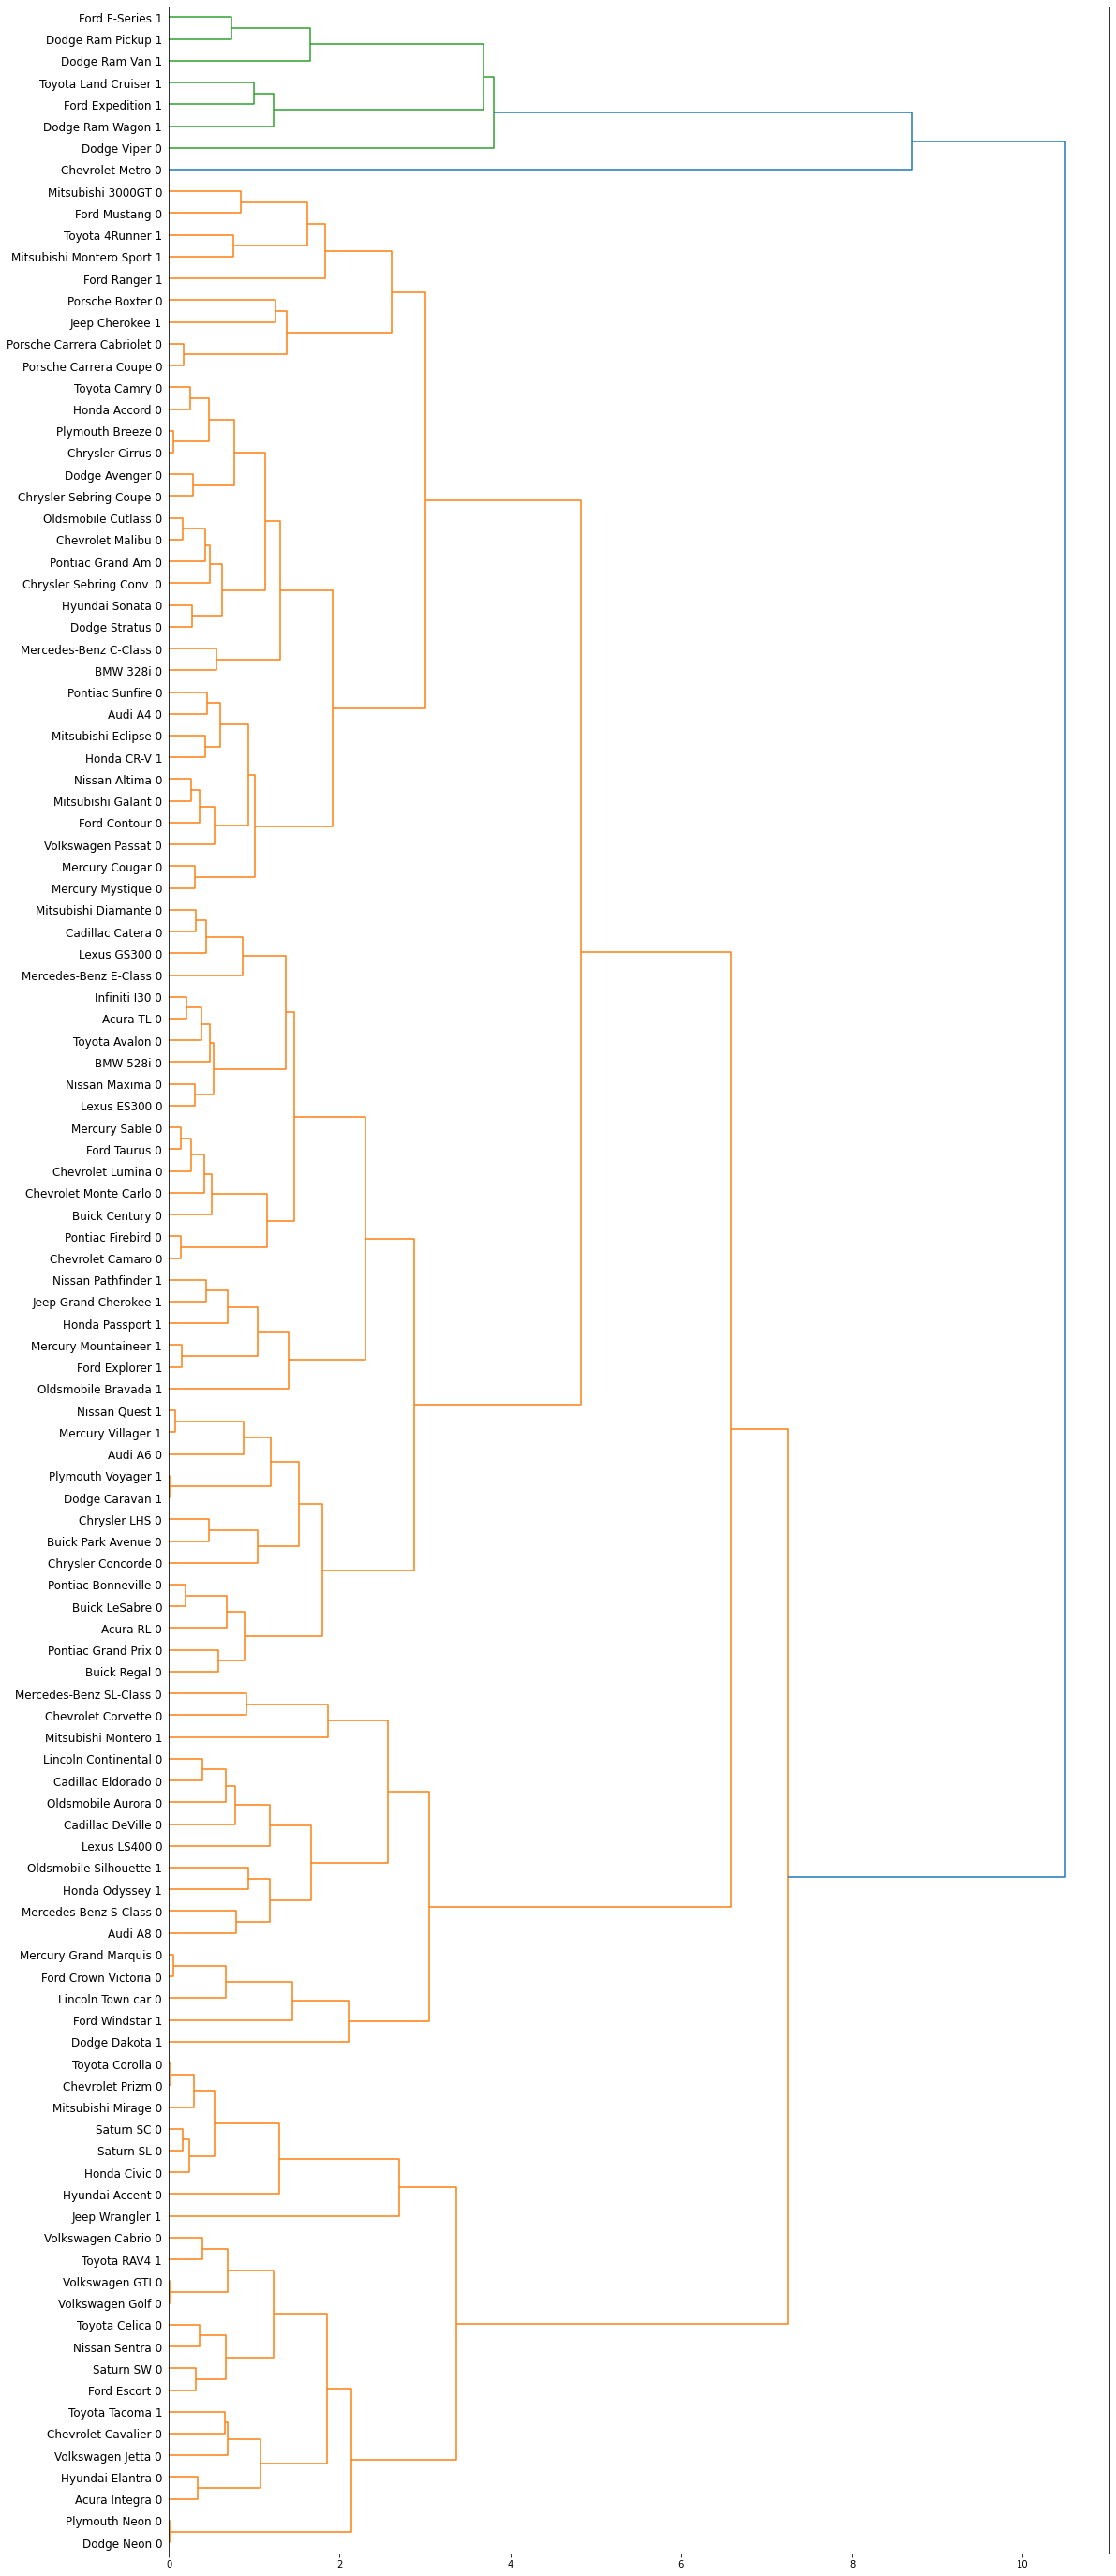

In [9]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return "{} {} {}".format(data["manufact"][id], data["model"][id], int(float(data["type"][id])))
dendro = dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation="right")

## Clustering using Sklearn

In [10]:
distance_matrix = euclidean_distances(feature_matrix, feature_matrix)

In [11]:
Z_distance_matrix = linkage(distance_matrix, "complete")

/tmp/ipykernel_15213/676537737.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_distance_matrix = linkage(distance_matrix, "complete")


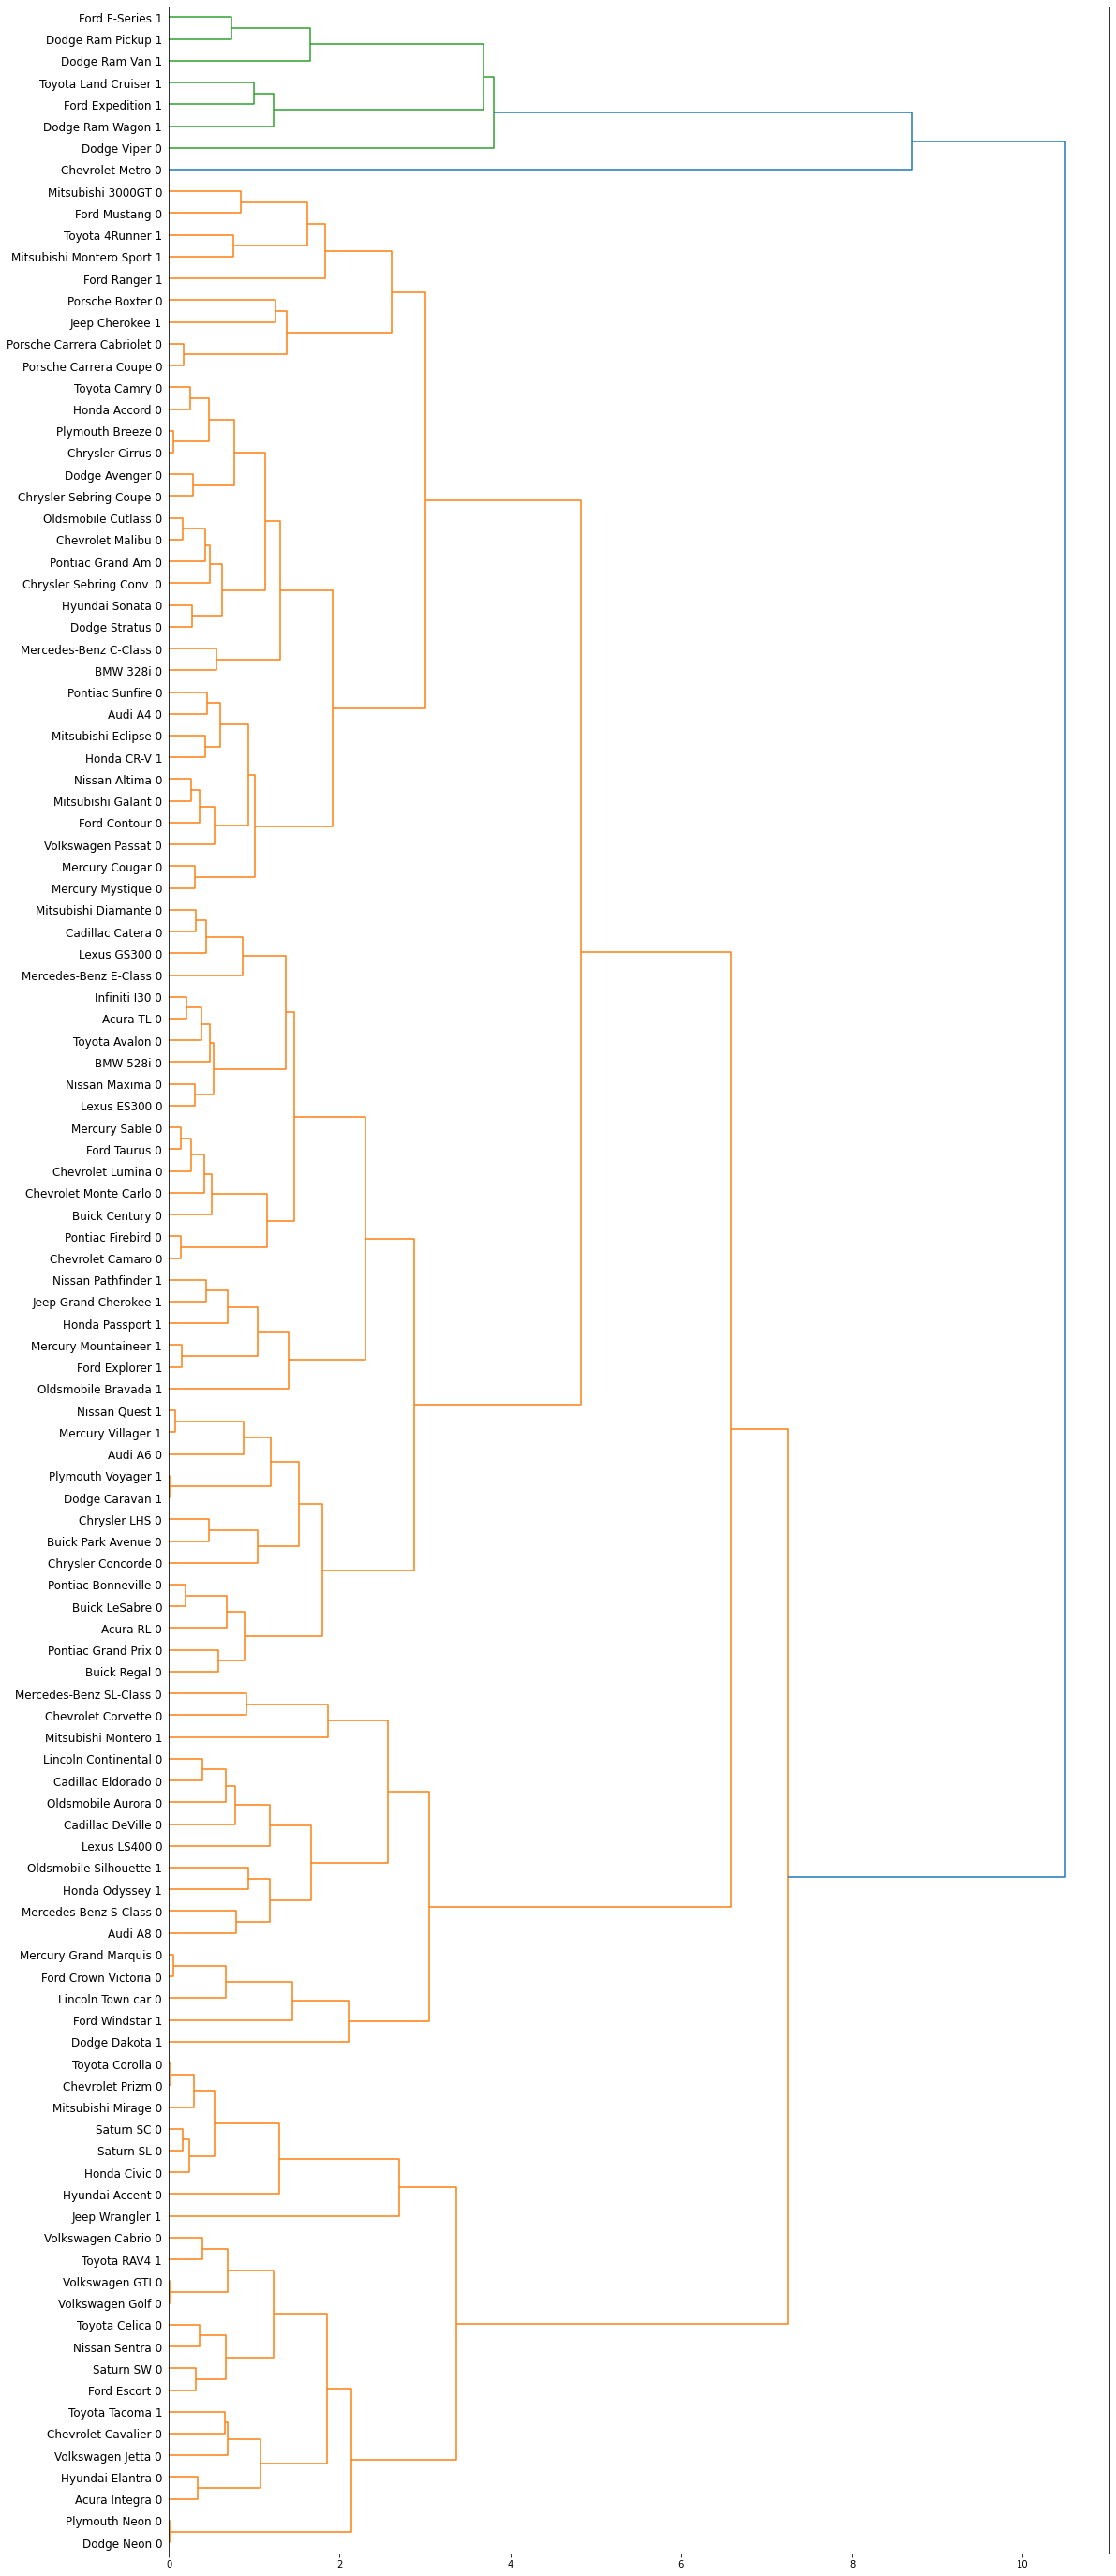

In [12]:
from scipy.cluster.hierarchy import dendrogram
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return "{} {} {}".format(data["manufact"][id], data["model"][id], int(float(data["type"][id])))
dendro = dendrogram(Z_distance_matrix, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation="right")

In [13]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = "complete")
agglom.fit(distance_matrix)

/home/chaitanya/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:567: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


AgglomerativeClustering(linkage='complete', n_clusters=6)

In [14]:
data["cluster_"] = agglom.labels_

Text(0, 0.5, 'Mpg')

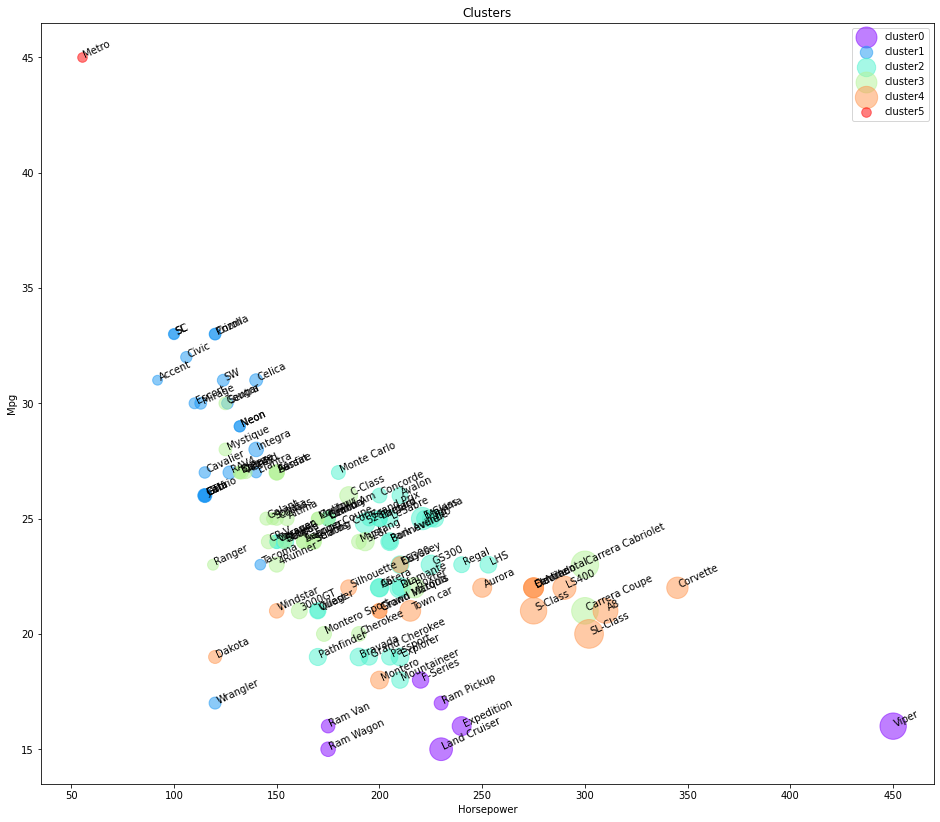

In [15]:

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_ == label]
    for i in subset.index :
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset["model"][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color.reshape(1,-1), label="cluster"+str(label), alpha=0.5)
plt.legend()
plt.title("Clusters")
plt.xlabel("Horsepower")
plt.ylabel("Mpg")

In [16]:
data.groupby(["cluster_", "type"])["cluster_"].count()

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [17]:
agg_cars = data.groupby(["cluster_", "type"])[["horsepow", "engine_s", "mpg", "price"]].mean()

/tmp/ipykernel_15213/3987942828.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')


Text(0, 0.5, 'Mpg')

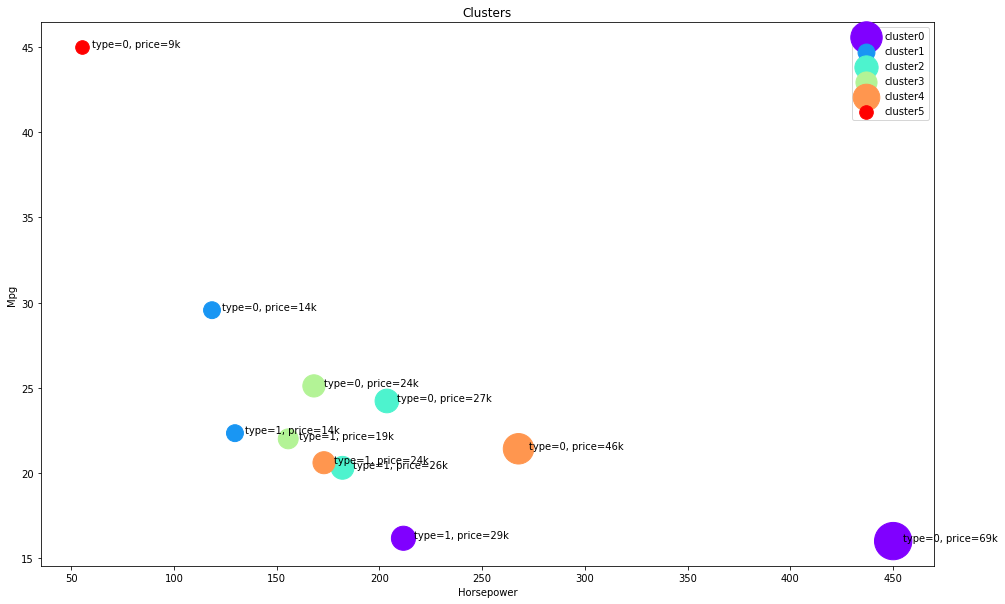

In [18]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index :
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color.reshape(1,-1), label="cluster"+str(label))
plt.legend()
plt.title("Clusters")
plt.xlabel("Horsepower")
plt.ylabel("Mpg")